In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample_submission.csv')
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [9]:
df_ex = df.copy()
df_ex.iloc[:] = 0

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_1301/3759698944.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex.iloc[:] = 0


In [10]:
df_ex.head(2)

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Let's clip the values to 6-16 and see the results
df_ex.target = df.target.clip(7, 16)

In [12]:
column_names = ['O2_1', 'O2_2', 'BOD5_5', 'NH4_6']
column_names_3 = ['O2_1', 'O2_2', 'BOD5_5']

In [13]:
# Most important features were O2_1, O2_2, BOD5_5, NH4_6 lets get them into df_ex

df_ex[column_names_3] = df[column_names_3]
df_ex.to_csv('sub14.csv', index=False)

No a substantial difference

In [16]:
# Let's clip at 7 to 16 and delete everything outside of 3std

df['O2_1'].std()
df['O2_1'].mean()

8.216992571428571

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cf79a2c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cf79a1570>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cf79f40d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cf79a3820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cf79a05b0>],
 'means': []}

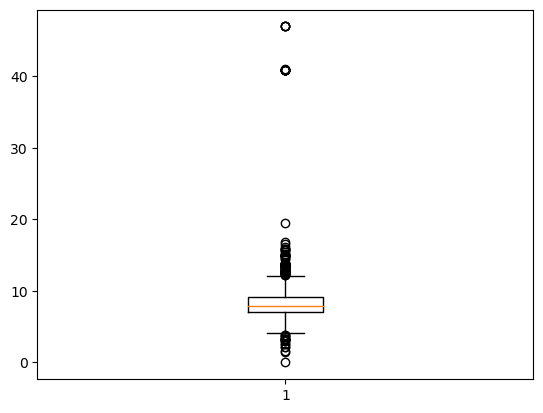

In [17]:
plt.boxplot(df['O2_1'])

In [20]:
high = df['O2_1'].mean() + (3*df['O2_1'].std())
low = df['O2_1'].mean() - (3*df['O2_1'].std())
print(f'We clip at {low} to {high}')

We clip at -0.9052361674178453 to 17.339221310274986


This doesn't seem a good way.

Below is copied from kaggle more specifically from [this link](https://www.kaggle.com/code/act18l/added-lof-svm-iforest-very-simple-approach)

In [32]:
from sklearn.linear_model import SGDOneClassSVM
#df = df.reset_index(drop=True)

In [33]:
clf = SGDOneClassSVM(nu=0.55).fit(df.drop(['id'],axis=1))
# Training data is every column except id

In [ ]:
len(np.where(clf.predict(df.drop(['id'],axis=1)) == -1)[0])

37

In [46]:
print(len(np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]))

37


In [ ]:
df.index[np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]]

Int64Index([  76,  133,  282,  302,  433,  454,  463,  476,  510,  543,  613,
             749,  797,  807, 1054, 1248, 1375, 1502, 1625, 1626, 1662, 1719,
            1955, 2006, 2360, 2378, 2445, 2530, 2533, 2535, 2627, 2793, 3112,
            3322, 3324, 3376, 3464],
           dtype='int64')

In [48]:
df.drop(df.index[np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]], axis=0, inplace=True)


In [49]:
print(len(df))

3463


In [50]:
# Now use of isolation foreset

In [51]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df.drop(['id'],axis=1))
len(np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0])

59

In [52]:
df.drop(df.index[np.array(np.where(clf.predict(df.drop(['id'],axis=1))==-1))[0]], axis=0, inplace=True)
len(df)

3404

In [53]:
from sklearn.neighbors import LocalOutlierFactor


data = df.drop(['id'], axis=1)

In [54]:
# Select a subset of features for visualization (excluding 'id')
selected_features = df.columns[2:]

In [55]:
# Create an instance of LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

In [56]:
lof

LocalOutlierFactor(contamination=0.1, n_neighbors=3)

In [57]:
# Fit the model and predict anomalies
predictions = lof.fit_predict(df[selected_features])

In [64]:
np.where(predictions==-1)

(array([  14,   29,   36,   37,   46,   49,   82,  104,  113,  123,  124,
         130,  131,  133,  135,  155,  172,  176,  179,  195,  198,  205,
         214,  216,  232,  253,  254,  269,  280,  294,  295,  312,  318,
         326,  330,  353,  356,  366,  370,  397,  422,  423,  431,  437,
         439,  452,  454,  473,  504,  536,  543,  546,  572,  575,  580,
         587,  593,  597,  617,  620,  630,  640,  643,  646,  649,  671,
         673,  692,  707,  711,  712,  718,  725,  739,  752,  758,  765,
         781,  795,  808,  814,  827,  834,  835,  836,  840,  852,  859,
         876,  887,  890,  901,  905,  911,  933,  942,  955,  956,  975,
         984, 1002, 1003, 1007, 1013, 1014, 1022, 1029, 1039, 1048, 1071,
        1086, 1091, 1112, 1133, 1136, 1145, 1159, 1160, 1173, 1189, 1201,
        1203, 1207, 1238, 1249, 1287, 1289, 1295, 1296, 1297, 1307, 1309,
        1317, 1321, 1323, 1326, 1327, 1328, 1339, 1343, 1348, 1363, 1374,
        1385, 1399, 1412, 1424, 1430, 

In [65]:
# Find the indices of anomalies (outliers)
anomaly_indices = np.where(predictions == -1)[0]

# Remove anomalies from the DataFrame
df = df.drop(index=df.index[anomaly_indices])

In [66]:
len(df)

3063

In [67]:
# We basically annihilated the df :)
df.to_csv('sub14-intern.csv', index=False)

In [69]:
df_o = df.copy()

In [70]:
df[:]=0

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_1301/2104695013.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df[:]=0


In [74]:
df[column_names] = df_o[column_names]
df['target'] = df_o['target']

In [76]:
df.to_csv('sub14-3.csv', index=False)

In [80]:
df['NH4_6'] = 0
df['NH4_6']

0       0
1       0
2       0
3       0
4       0
       ..
3494    0
3495    0
3496    0
3497    0
3499    0
Name: NH4_6, Length: 3063, dtype: int64

In [82]:
df.to_csv('sub14-2.csv', index=False)